<a href="https://colab.research.google.com/github/geethika3099/DETECTION-AND-SEGMENTATION-OF-DIFFERENT-STRUCTURES-ON-PLANET-SURFACE-IMAGES/blob/master/Mars_Rock_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from keras.preprocessing import image

# /content/drive/My Drive/mars_train

Using TensorFlow backend.


In [0]:
path="/content/drive/My Drive/mars_train"
def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.jpg')])
    return image_files
  

In [0]:
import os
dataset = loadImages(path)

In [0]:
dataset[0]

'/content/drive/My Drive/mars_train/rock-1.jpg'

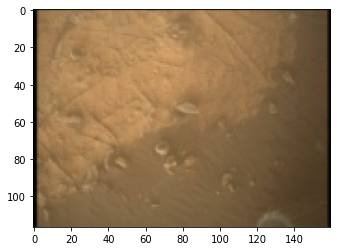

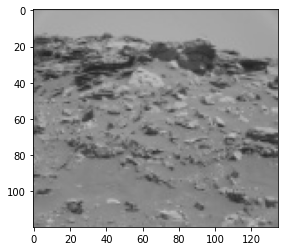

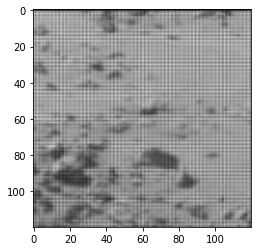

In [0]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
for ima in dataset[0:3]:
  img=mpimg.imread(ima)
  imgplt=plt.imshow(img)
  plt.show()  

In [0]:
nrows = 150
ncolumns = 150
channels = 3

In [0]:
def read_and_process_image(list_of_images):
  x=[]
  y=[]
  rock=0
  surface=0
  print(len(list_of_images))
  for image in list_of_images:
    x.append(cv2.resize(cv2.imread(image , cv2.IMREAD_COLOR), (nrows,ncolumns),interpolation=cv2.INTER_CUBIC))
    if 'rock' in image:
      y.append(1)
      rock=rock+1
     
    elif 'surface' in image:
      y.append(0)
      surface=surface+1
  print(rock)
  print(surface)
  return x,y

In [0]:
import cv2
X, y = read_and_process_image(dataset)

83
46
37


In [0]:
X[0]

array([[[ 11,   9,   8],
        [  3,  10,  17],
        [ 48,  68,  94],
        ...,
        [ 40,  61,  77],
        [ 19,  30,  38],
        [  1,   7,  10]],

       [[  6,   4,   3],
        [  5,  13,  19],
        [ 60,  82, 106],
        ...,
        [ 49,  70,  86],
        [ 21,  32,  40],
        [  1,   4,   7]],

       [[  1,   1,   0],
        [  6,  15,  21],
        [ 68,  93, 116],
        ...,
        [ 56,  77,  93],
        [ 24,  36,  43],
        [  0,   3,   6]],

       ...,

       [[  0,   2,   2],
        [  4,  12,  16],
        [ 56,  75,  90],
        ...,
        [ 40,  56,  73],
        [ 17,  26,  34],
        [  0,   2,   3]],

       [[  0,   2,   2],
        [  4,  12,  16],
        [ 56,  75,  90],
        ...,
        [ 40,  57,  74],
        [ 18,  27,  35],
        [  0,   3,   4]],

       [[  0,   1,   1],
        [  4,  12,  16],
        [ 56,  75,  90],
        ...,
        [ 41,  57,  75],
        [ 19,  28,  36],
        [  0,   4,   5]]

In [0]:
y[0]

1

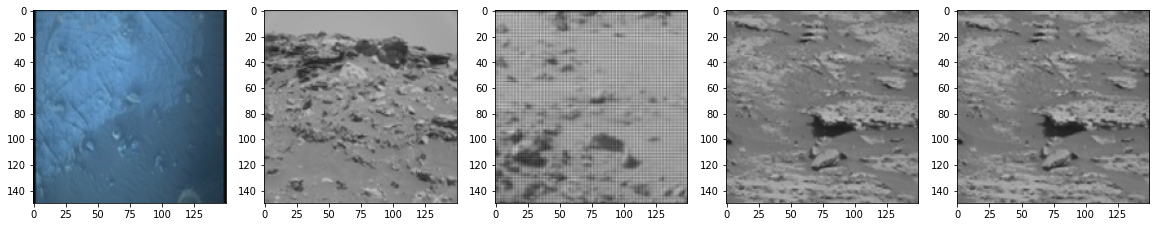

In [0]:
plt.figure(figsize=(20,10))
columns=5
for i in range(columns):
  plt.subplot(5/columns+1,columns,i+1)
  plt.imshow(X[i])

Text(0.5, 1.0, 'Rock and Surface')

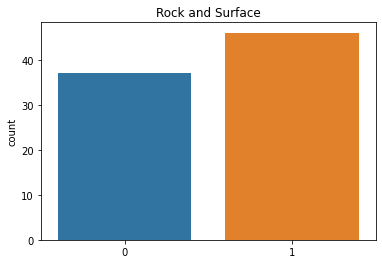

In [0]:
import seaborn as sns
import numpy as np
X=np.array(X)
Y=np.array(y)
sns.countplot(y)
plt.title('Rock and Surface')

In [0]:
print("shape of train images",X.shape)
print("shape of labels",Y.shape)

shape of train images (83, 150, 150, 3)
shape of labels (83,)


In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [0]:
from keras.models import Sequential
from keras import models
from keras import  layers
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [0]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [0]:
model.compile(loss="binary_crossentropy",optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [0]:
train_datagen=ImageDataGenerator(rescale=1./255 , 
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)


In [0]:
train_generator = train_datagen.flow(X_train, Y_train, batch_size=10)
val_generator = test_datagen.flow(X_test,Y_test,batch_size=10)

In [0]:
history=model.fit_generator(train_generator,epochs=64,validation_data=val_generator)

Epoch 1/64
7/7 [==============================] - 4s 596ms/step - loss: 0.6870 - acc: 0.5909 - val_loss: 0.6609 - val_acc: 0.5882
Epoch 2/64
7/7 [==============================] - 3s 498ms/step - loss: 0.6217 - acc: 0.6818 - val_loss: 0.6572 - val_acc: 0.7059
Epoch 3/64
7/7 [==============================] - 3s 492ms/step - loss: 0.5514 - acc: 0.7879 - val_loss: 0.7046 - val_acc: 0.7059
Epoch 4/64
7/7 [==============================] - 3s 481ms/step - loss: 0.4671 - acc: 0.8788 - val_loss: 0.8163 - val_acc: 0.7059
Epoch 5/64
7/7 [==============================] - 4s 509ms/step - loss: 0.3839 - acc: 0.8636 - val_loss: 0.6995 - val_acc: 0.7647
Epoch 6/64
7/7 [==============================] - 3s 494ms/step - loss: 0.3633 - acc: 0.8788 - val_loss: 0.3701 - val_acc: 0.7059
Epoch 7/64
7/7 [==============================] - 3s 488ms/step - loss: 0.2662 - acc: 0.8939 - val_loss: 0.6967 - val_acc: 0.7647
Epoch 8/64
7/7 [==============================] - 4s 511ms/step - loss: 0.4250 - acc: 0.77

Test Data

In [0]:
path="/content/drive/My Drive/mars_test"
def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.jpg')])
    return image_files
  

In [0]:
test_dataset = loadImages(path)

In [0]:
X_test1, y_test1 = read_and_process_image(test_dataset)

16
11
5


In [0]:
X_test1=np.array(X_test1)

In [0]:
print("shape of train images",X_test1.shape)

shape of train images (16, 150, 150, 3)


In [0]:
test1_datagen=ImageDataGenerator(rescale=1./255)

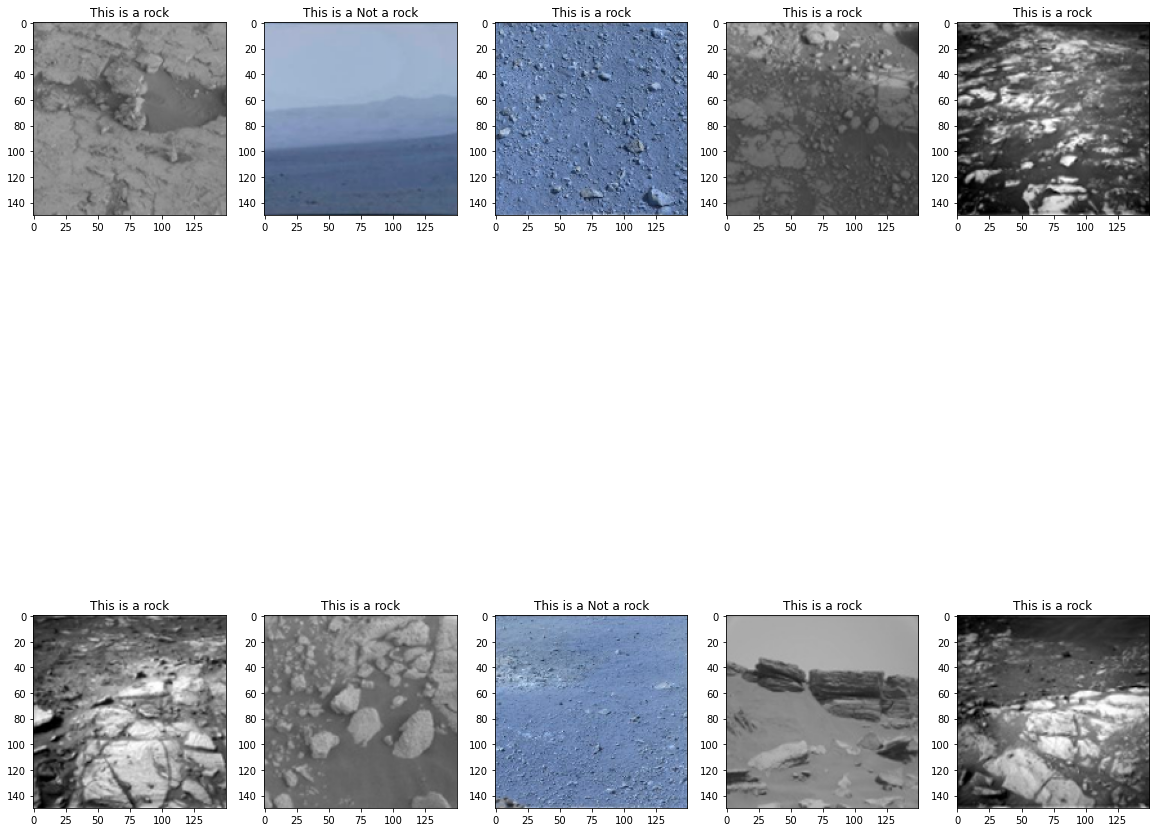

In [0]:
i=0
text_labels=[]
plt.figure(figsize=(20,20))
for batch in test1_datagen.flow(X_test1,batch_size=1):
  pred=model.predict(batch)
  if pred>0.5 :
   text_labels.append('rock')
  else:
     text_labels.append('Not a rock')
  plt.subplot(5/columns+1,columns,i+1)
  plt.title('This is a '+text_labels[i])
  imgplot=plt.imshow(batch[0])
  i+=1
  if i%10==0:
    break
plt.show()